# Ford-go-bike-trip data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Exploratory Data Analysis</a></li>
<li><a href="#eda">Explanatory Data Analysis</a></li>
</ul>

# Introduction

This Data set is from fordgobike-tripdata and it contains the rented bike users information. in this project we will do an appropriate Explaratory analysis and Explanatory analysis to discover any patterns or relationships between the data. 

# Explaratory analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('201902-fordgobike-tripdata.csv')

***Univariate exploration of data***

<AxesSubplot:xlabel='user_type', ylabel='count'>

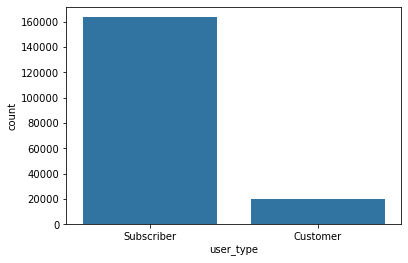

In [2]:
user_type = df['user_type'].value_counts().index
color = sb.color_palette()[0]
sb.countplot(data = df , x='user_type' , color = color ,order = user_type)

- This bar chart shows the majorty of bike user are subscribers and with huge diffrence

In [3]:
df['duration_sec'] = df['duration_sec']/60

In [4]:
df = df.rename(columns={'duration_sec': 'duration_min'})

([<matplotlib.axis.XTick at 0x282e29321f0>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(9, 0, '9'),
  Text(18, 0, '18'),
  Text(36, 0, '36'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(600, 0, '600')])

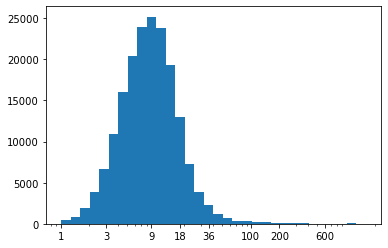

In [5]:
bins = 10**np.arange(0.007, 3.2 +0.1 , 0.1)
plt.hist(data =df , x='duration_min' ,bins=bins)
plt.xscale('log')
ticks=[1,3,9,18 ,36,100 ,200 ,600]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks , labels)


- Here we converted the time duration from seconds into minutes abd used the log scaling to recieve appropriate histogram, the histogram here is normally distributed with one peek most of the data falls down between the 3 minutes and 18 minutes. 

<AxesSubplot:xlabel='member_gender', ylabel='count'>

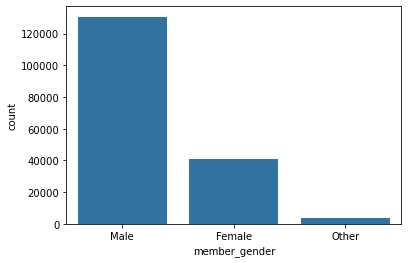

In [6]:
user_gen = df['member_gender'].value_counts().index
color = sb.color_palette()[0]
sb.countplot(data = df , x='member_gender' , color = color ,order = user_gen)

- This bar chart shows that the majority of the bike renters are Male

***Biviriate exploration of data***

<AxesSubplot:xlabel='member_birth_year', ylabel='duration_min'>

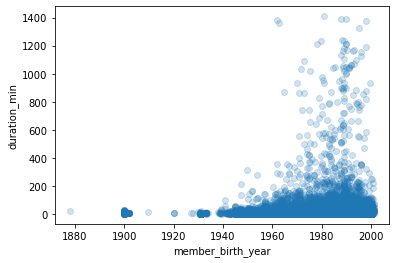

In [7]:
sb.regplot(data = df , x='member_birth_year' , y='duration_min' ,fit_reg=False ,x_jitter=0.3 , scatter_kws={'alpha':1/5})

- Here in the scatter plot we can see an interesting relationship between the birth year and duration , the younger the person was the longer he could ride a bike.

<AxesSubplot:xlabel='member_gender', ylabel='count'>

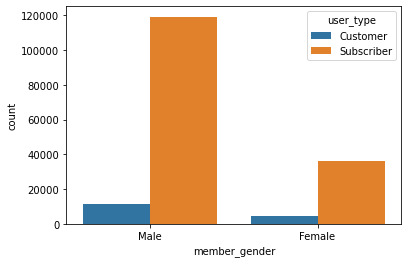

In [8]:
base_color = sb.color_palette()[0]
d = df.loc[df['member_gender'].isin(['Male' ,'Female'])]
sb.countplot(data = d , x ='member_gender' ,  hue='user_type')

- Here i used a clusterd bar chart to compare two qualitative data (user type vs member gender) and the result is male are more in both user types.

C:\Users\Abdulaziz baidas\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x282e37244c0>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(9, 0, '9'),
  Text(18, 0, '18'),
  Text(36, 0, '36'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(600, 0, '600')])

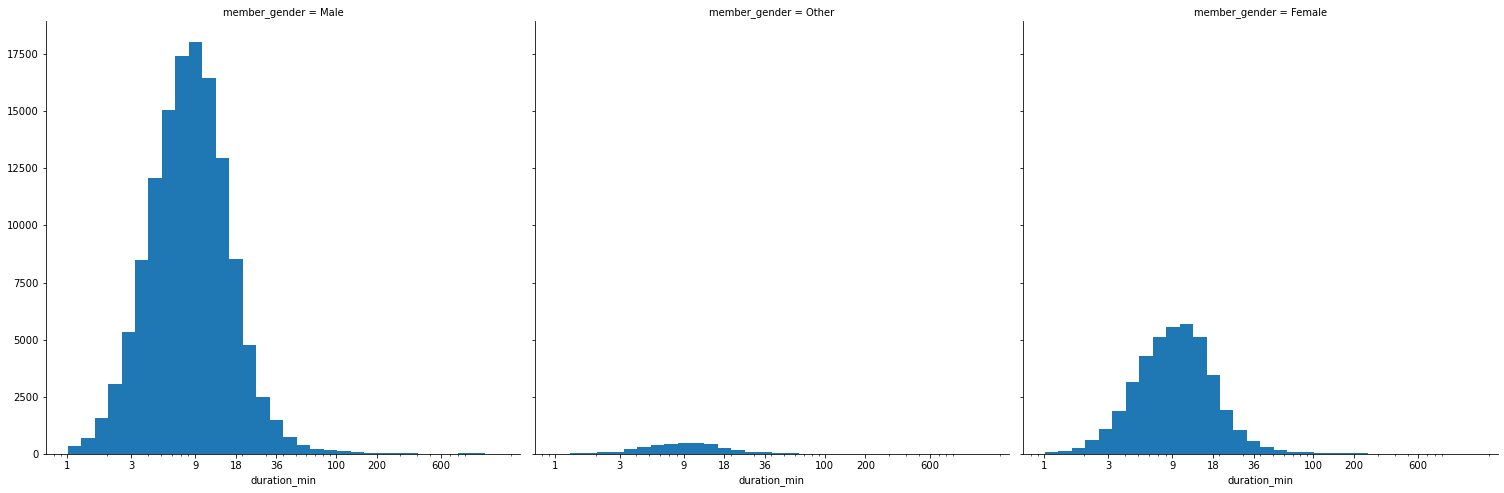

In [9]:
bins = 10**np.arange(0.007, 3.2 +0.1 , 0.1)
g = sb.FacetGrid(data = df , col='member_gender' ,col_wrap=3 ,size=7)
plt.xscale('log')
g.map(plt.hist ,'duration_min' ,bins=bins )
ticks=[1,3,9,18 ,36,100 ,200 ,600]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks , labels)

- Here i used histogram to compare quantitave and qualitative (member gender vs duration) and the results here are intresting, most of the data in the three gender types falled between 3 and 18 minutes.

***Multiviriate exploration of data***

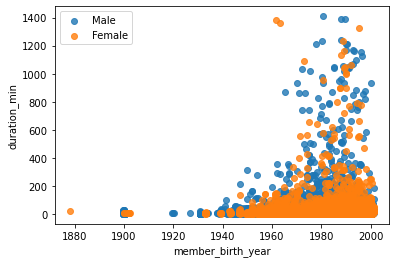

In [10]:
ttype_marker = [['Male' ,'o'] ,['Female' ,'o']]
for ttype , marker in ttype_marker:
    plot_data = df.loc[df['member_gender']==ttype]
    sb.regplot(data = plot_data , x='member_birth_year' , y='duration_min' , x_jitter=0.4 , fit_reg=False , marker = marker);
plt.legend(['Male' ,'Female'])  

- Here i plotted a scatter plot to see the relationship between the birth year and the duration dependent on the gender type , there is a strong realationship between the birth year and duration but the gender is not useful here.

(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Other'), Text(2, 0, 'Female')])

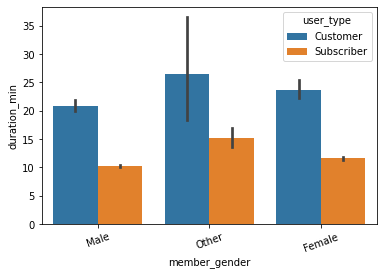

In [11]:
sb.barplot(data = df , x='member_gender' , y='duration_min' ,hue='user_type')
plt.xticks(rotation=20)

- Here i used a clusterd bar chart to explore a multivariate relationship between , as we can see the costumer user type in the three genders have a longer duration time than the subscriber.

# Explanatory data analysis

***- First insight***

Text(0.5, 1.0, 'User type count')

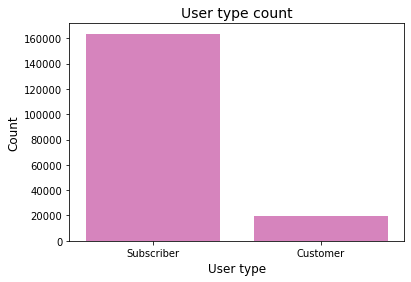

In [12]:
user_type = df['user_type'].value_counts().index
color = sb.color_palette()[6]
sb.countplot(data = df , x='user_type' , color = color ,order = user_type)
plt.xlabel('User type' , size=12)
plt.ylabel('Count' , size=12)
plt.title('User type count' , size=14)

- There is more subscribers than costumers in this data set. 

***- Second insight***

Text(0.5, 1.0, 'Duration per minute count')

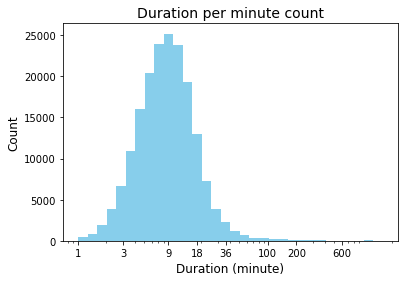

In [13]:
bins = 10**np.arange(0.007, 3.2 +0.1 , 0.1)
plt.hist(data =df , x='duration_min' ,bins=bins , color = "skyblue")
plt.xscale('log')
ticks=[1,3,9,18 ,36,100 ,200 ,600]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks , labels)
plt.xlabel('Duration (minute)' , size=12)
plt.ylabel('Count' , size=12)
plt.title('Duration per minute count' , size=14)

- Most of the bike renters falls in duration between 3 and 18 minutes.

***- Third insight***

Text(0.5, 1.0, 'Gender count')

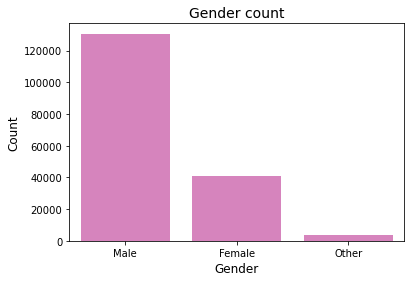

In [14]:
user_gen = df['member_gender'].value_counts().index
color = sb.color_palette()[6]
sb.countplot(data = df , x='member_gender' , color = color ,order = user_gen)
plt.xlabel('Gender' , size=12)
plt.ylabel('Count' , size=12)
plt.title('Gender count' , size=14)

- there is more males in this data set , then females comes in second , then other is the third. 

***- Fourth insight***

Text(0.5, 1.0, 'Birth year vs duration per minute')

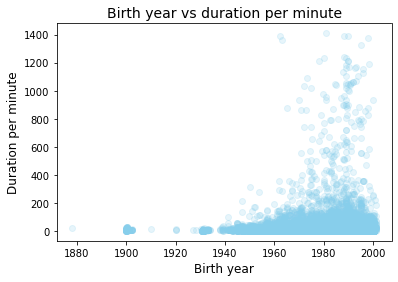

In [15]:
sb.regplot(data = df , x='member_birth_year' , y='duration_min' ,fit_reg=False ,x_jitter=0.3 , scatter_kws={'alpha':1/5} , color = "skyblue")
plt.xlabel('Birth year' , size=12)
plt.ylabel('Duration per minute' , size=12)
plt.title('Birth year vs duration per minute' , size=14)

- this scatterplot show that there is a relationship between the birth year and the duration per minute , so the younger the person was the more likely to have a longer ride.

***-Fifth insight***

Text(0.5, 1.0, 'Gender per user type')

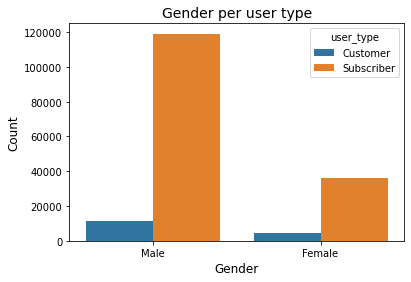

In [16]:
base_color = sb.color_palette()[0]
d = df.loc[df['member_gender'].isin(['Male' ,'Female'])]
sb.countplot(data = d , x ='member_gender' ,  hue='user_type')
plt.xlabel('Gender' , size=12)
plt.ylabel('Count' , size=12)
plt.title('Gender per user type' , size=14)

- There are more subscriber user type in both genders.

***-Sixth insight***

Text(0.5, 1.0, 'Birth year vs Duration per minute per gender')

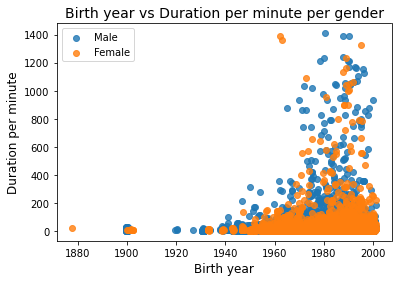

In [17]:
ttype_marker = [['Male' ,'o'] ,['Female' ,'o']]
type_colors = {'Male': '#ee99ac', 'Female': '#7038f8'}
for ttype , marker in ttype_marker:
    plot_data = df.loc[df['member_gender']==ttype]
    sb.regplot(data = plot_data , x='member_birth_year' , y='duration_min',x_jitter=0.4 , fit_reg=False ,marker = marker);
plt.legend(['Male' ,'Female']) 
plt.xlabel('Birth year' , size=12)
plt.ylabel('Duration per minute' , size=12)
plt.title('Birth year vs Duration per minute per gender' , size=14)

- here we can see that there is a positive relationship between the birth year and the duration but the gender doesn't add anything here.

***- Sivinth insight***

Text(0.5, 1.0, 'User type vs Duration (m) per gender')

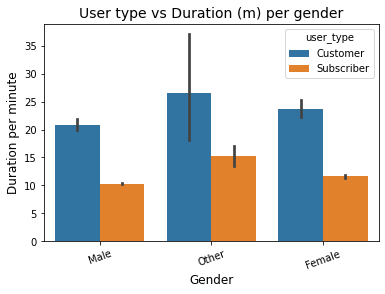

In [18]:
sb.barplot(data = df , x='member_gender' , y='duration_min' ,hue='user_type')
plt.xticks(rotation=20)
plt.xlabel('Gender' , size=12)
plt.ylabel('Duration per minute' , size=12)
plt.title('User type vs Duration (m) per gender' , size=14)

- in all genders the costumer users type has more duration time than subscribers users. 